In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for London
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [5]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)

In [7]:
if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [9]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,91,0.0
1,2022-01-01T01:00,12.7,93,0.0
2,2022-01-01T02:00,12.8,93,0.0
3,2022-01-01T03:00,12.5,93,0.0
4,2022-01-01T04:00,12.3,92,0.0


In [11]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [13]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013082,76.635388,0.075662
std,6.651766,16.722080,0.404500
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


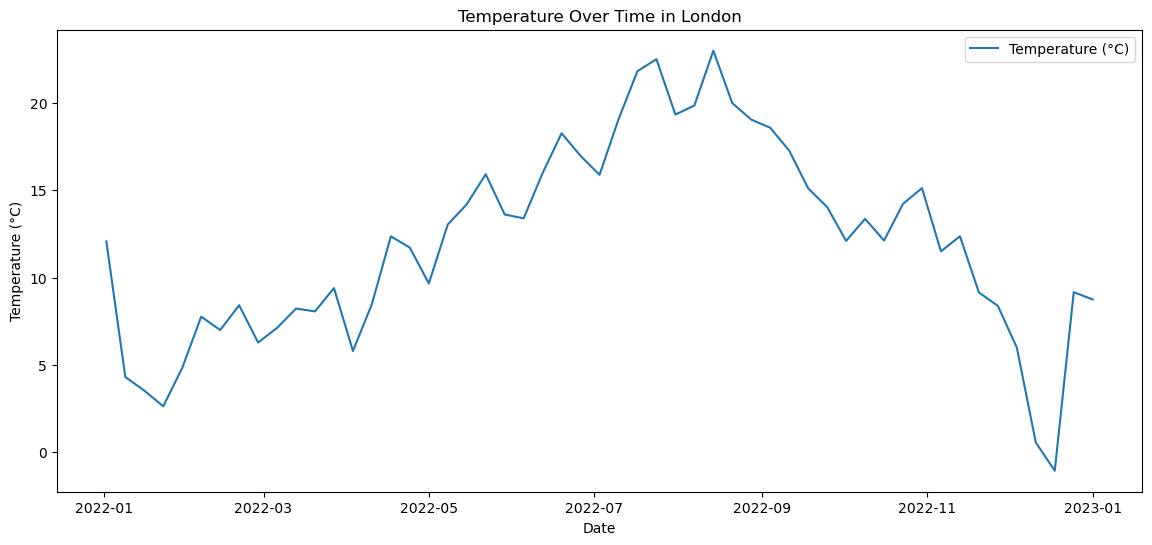

In [15]:
#Change data to weekly
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = pd.Series(range(len(date_range)), index=date_range)
weekly_data = data.resample('W').mean()

weekly_temp = df['temperature_2m'].resample('W').mean()

# Plot Temperature Over Time
plt.figure(figsize=(14, 6))
plt.plot(weekly_data.index, weekly_temp, label='Temperature (°C)')
plt.title('Temperature Over Time in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

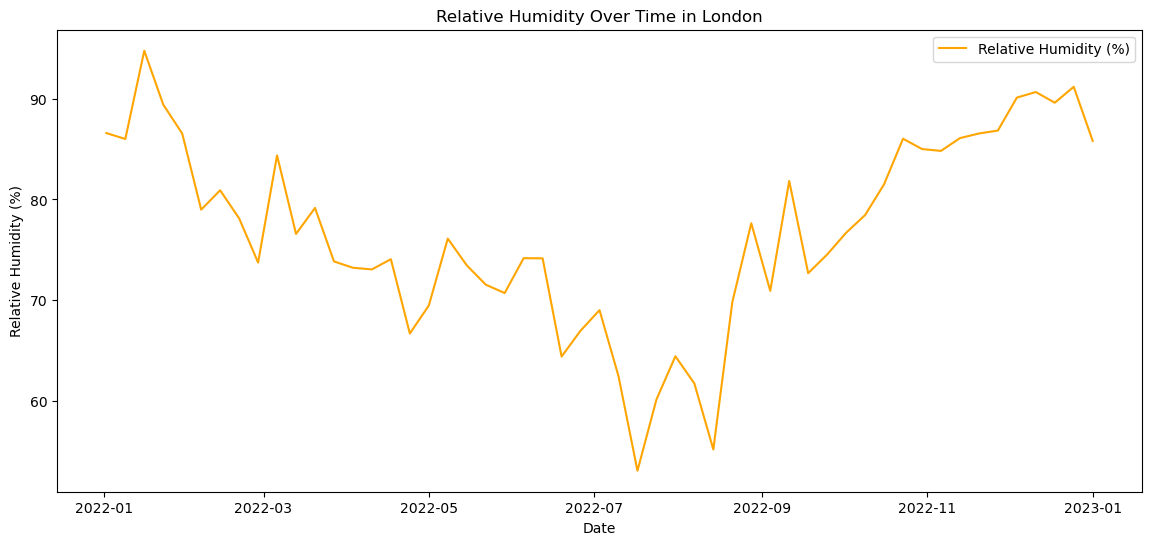

In [17]:
# Plot Relative Humidity Over Time
weekly_hum = df['relativehumidity_2m'].resample('W').mean()

plt.figure(figsize=(14, 6))
plt.plot(weekly_data.index, weekly_hum, color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in London')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

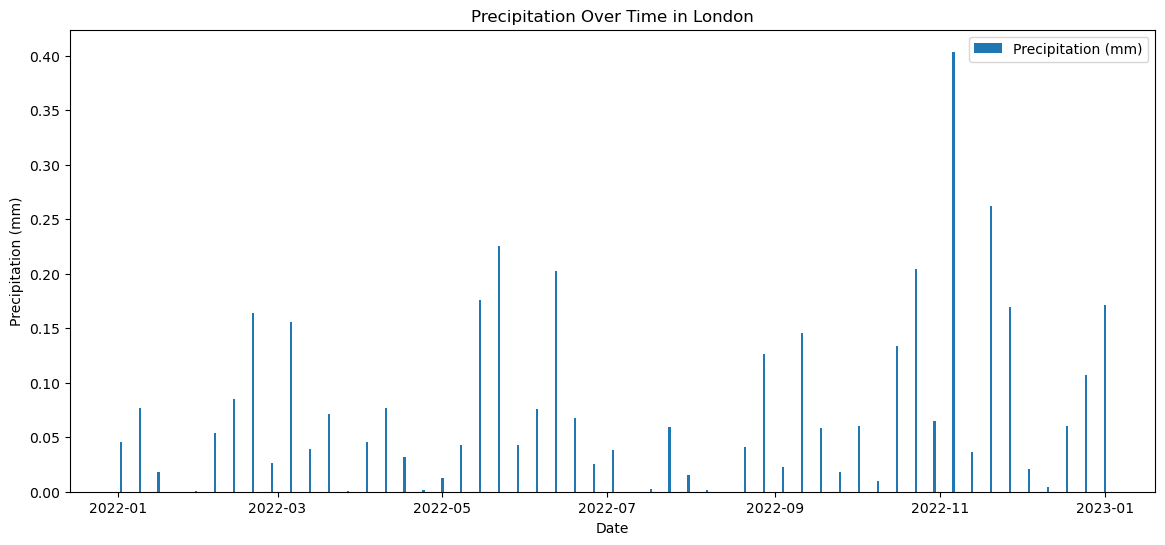

In [19]:
# Plot Precipitation Over Time
weekly_pre = df['precipitation'].resample('W').mean()

plt.figure(figsize=(14, 6))
plt.bar(weekly_data.index, weekly_pre, label='Precipitation (mm)')
plt.title('Precipitation Over Time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [21]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = weekly_temp.corr(weekly_hum)
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')

Correlation between Temperature and Relative Humidity: -0.75


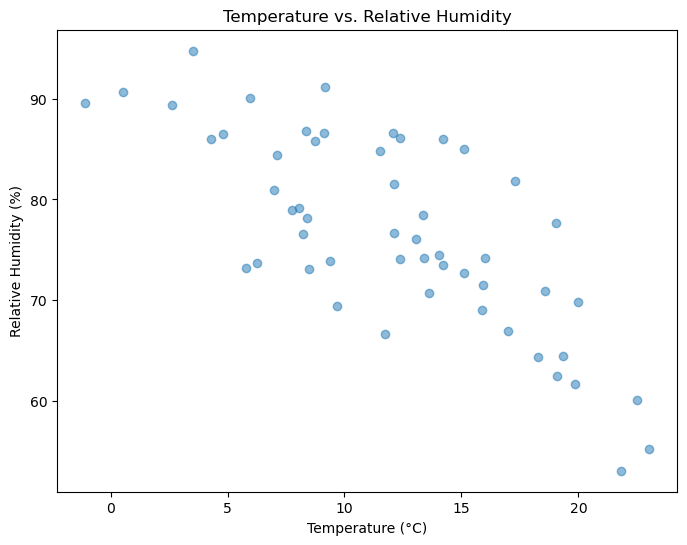

In [23]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(weekly_temp, weekly_hum, alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

In [25]:
# Step 7: Resample Data to Weekly Averages

weekly_avg = df.resample('W').mean()
weekly_avg.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,12.077083,86.583333,0.045833
2022-01-09,4.293452,86.000000,0.076786
2022-01-16,3.513095,94.750000,0.018452
2022-01-23,2.611310,89.404762,0.000000
2022-01-30,4.813690,86.535714,0.000595


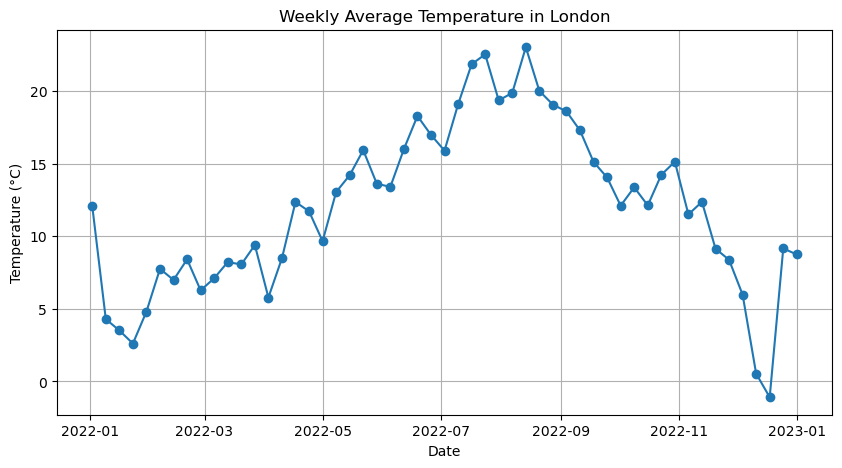

In [27]:
# Plot Weekly Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['temperature_2m'], marker='o')
plt.title('Weekly Average Temperature in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [29]:
# Step 8: Compare with Seattle

# Coordinates for Seattle
latitude_sea = 47.6062
longitude_sea = -122.3321

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_sea = requests.get(base_url, params=params_sea)

# Load and clean Seattle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.fillna(method='ffill', inplace=True)

C:\Users\mchar\AppData\Local\Temp\ipykernel_8920\2467557049.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea.fillna(method='ffill', inplace=True)


In [31]:
# Resample Seattle Data to Weekly Averages

weekly_avg_sea = df_sea.resample('W').mean()

In [33]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London': weekly_avg['temperature_2m'],
    'Seattle': weekly_avg_sea['temperature_2m']
})

In [35]:
combined_temp.head()

,London,Seattle
time,,
2022-01-02,12.077083,-0.664583
2022-01-09,4.293452,3.792262
2022-01-16,3.513095,6.348810
2022-01-23,2.611310,5.747024
2022-01-30,4.813690,2.620833


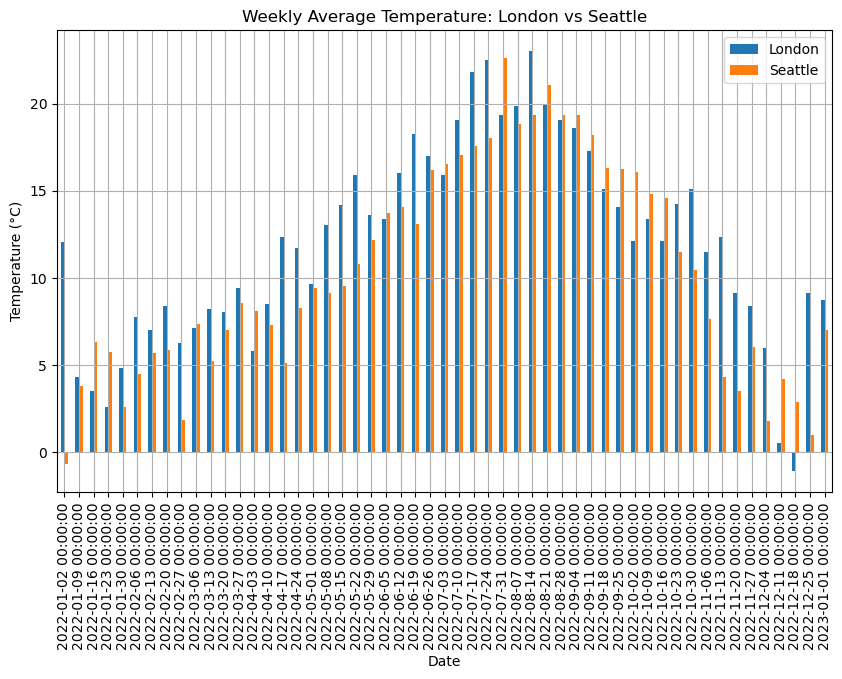

In [37]:
# Plot Comparison of Weekly Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Temperature: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [39]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Seattle'] - combined_temp['London']
combined_temp

,London,Seattle,Temp Difference
time,,,
2022-01-02,12.077083,-0.664583,-12.741667
2022-01-09,4.293452,3.792262,-0.501190
2022-01-16,3.513095,6.348810,2.835714
2022-01-23,2.611310,5.747024,3.135714
2022-01-30,4.813690,2.620833,-2.192857
2022-02-06,7.754167,4.503571,-3.250595
2022-02-13,6.988690,5.690476,-1.298214
2022-02-20,8.408929,5.858929,-2.550000
2022-02-27,6.272024,1.822619,-4.449405


In [ ]:
Analysis: London overall had higher temperatures than Seattle which could possibly lead to more rainfall during the year. During the middle of August to the middle of October, Seattle experiences higher temperatures than London which can possibly lead to more rainfall during that time of year.